# Importing the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X = sc.fit_transform(X)
X

array([[  8.42681467e-01,   1.00000000e+00,   1.25263158e-01, ...,
          5.00000000e-01,   5.00000000e-02,   1.21200000e-02],
       [  6.96090562e-01,   0.00000000e+00,   1.34135338e-01, ...,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  3.88981656e-01,   0.00000000e+00,   2.38045113e-01, ...,
          5.00000000e-01,   1.40000000e-01,   0.00000000e+00],
       ..., 
       [  4.39420332e-01,   0.00000000e+00,   7.63909774e-02, ...,
          5.00000000e-01,   5.00000000e-02,   0.00000000e+00],
       [  8.44034934e-01,   0.00000000e+00,   2.05563910e-01, ...,
          5.00000000e-01,   6.00000000e-02,   1.10000000e-04],
       [  1.06907888e-01,   1.00000000e+00,   4.09774436e-01, ...,
          0.00000000e+00,   2.80000000e-01,   0.00000000e+00]])

# Training the SOM

In [9]:
from minisom import MiniSom

In [10]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som

In [13]:
som.random_weights_init(X)

In [14]:
som.train_random(data = X, num_iteration = 100)

# Visualizing the Results

In [15]:
from pylab import bone, pcolor, colorbar, plot, show

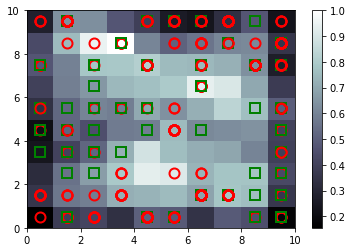

In [16]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


# Finding the Frauds

In [18]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

array([[  1.57779940e+07,   1.00000000e+00,   4.20000000e+01,
          9.79000000e+00,   2.00000000e+00,   1.40000000e+01,
          8.00000000e+00,   7.96000000e+00,   1.00000000e+00,
          1.00000000e+00,   8.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.57997850e+07,   1.00000000e+00,   5.64200000e+01,
          2.80000000e+01,   1.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   2.85000000e+01,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+01,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.60000000e+01],
       [  1.58107230e+07,   1.00000000e+00,   3.81700000e+01,
          1.01250000e+01,   2.00000000e+00,   1.40000000e+01,
          4.00000000e+00,   2.50000000e+00,   1.00000000e+00,
          1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   5.20000000e+02,   1.97000000e+02],
       [  1.57666630e+07,   1.00000000e+00,   5.39200000e+01,
     